# Neuron Tutorial 1: Scripting

## What can we model?

Neuron can model electrical properties of neurons which can take the form of:
    
- Single compartment or Multi compartment neuron
- Stylized or Anatomically detailed geometry
- Artificial Spiking Cells (e.g IntFire)
- Networks

Neuron also has a reaction diffusion module that can model diffusion, buffers, transport and exchange. 

## From Concept to Model

To model a realistic cell, Neuron conceptualize it by breaking it up into individual **sections**. A **section** is an unbranched cable with uniform _qualitative_ electrical properties. A **section** has a diameter, length and nseg property. nseg is a further division of section.

<img src="images/section.png" alt="Alt text" title="Title text" />

<!-- ![section]("./section.png") -->

Each section can be divided into one or more individual **segments**. At the center of each **segment** the cable equation is integrated to compute the voltage. 

<img src="images/segments.png" alt="Alt text" title="Title text" />

## How to Interface with NEURON

<img src="images/neuronsim.png" alt="Alt text" title="Title text" />


## How to Interface with NEURON

<img src="images/neuron_internal.jpg" alt="Alt text" title="Title text" />


In [1]:
from neuron import h
from neuron.units import ms, mV, µm
h.load_file("stdrun.hoc")

import matplotlib.pyplot as plt
from matplotlib import cm
import plotly

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
soma = h.Section(name="soma")
soma.L = 20
soma.diam = 20
soma.nseg = 1

dend_1 = h.Section(name="dend_1")
dend_1.L = 100
dend_1.diam = 1
dend_1.nseg = 10

dend_2 = h.Section(name="dend_2")
dend_2.L = 100
dend_2.diam = 1
dend_2.nseg = 10

dend_list = [dend_1,dend_2]

dend_1.connect(soma(1))
dend_2.connect(soma(1))


dend_2

In [3]:
h.topology()


|-|       soma(0-1)
   `---------|       dend_1(0-1)
   `---------|       dend_2(0-1)



1.0

In [4]:
list(h.allsec())

[soma, dend_1, dend_2]

In [5]:
for seg in dend_1:
    print(seg)

dend_1(0.05)
dend_1(0.15)
dend_1(0.25)
dend_1(0.35)
dend_1(0.45)
dend_1(0.55)
dend_1(0.65)
dend_1(0.75)
dend_1(0.85)
dend_1(0.95)


In [6]:
soma.psection()

{'point_processes': {},
 'density_mechs': {},
 'ions': {},
 'morphology': {'L': 20.0,
  'diam': [20.0],
  'pts3d': [],
  'parent': None,
  'trueparent': None},
 'nseg': 1,
 'Ra': 35.4,
 'cm': [1.0],
 'regions': set(),
 'species': set(),
 'name': 'soma',
 'hoc_internal_name': '__nrnsec_0x2bbf090',
 'cell': None}

In [7]:
ps1 = h.PlotShape(False)
ps1.plot(plotly).show(0)


NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


## Exercise 1a: Create a Neuron

<img src="images/exc1a.png" alt="Alt text" title="Title text" />


We have created sections without providing any x,y,z coordinates. If you want to create anatomically detailed models you can place sections on 3D coordinate system.

refer to : _h.define_shape()_, _sec.pt3dchange()_


## Adding Mechanisms

- Density Mechanisms (e.g Ion Channels)
- Point Processes
    - Electrodes
    - Synapses

### Density Mechanisms

Two inbuilt mechanisms

- Hodgkin Huxley ("hh")
- leak current ("pas")

In [8]:
h.hh.insert(soma)
h.pas.insert(dend_1)
h.pas.insert(dend_2)

# soma.insert("hh_custom")



### Accessing and modifying biophysical Variables

In [9]:
for sec in h.allsec():
    sec.Ra = 160
    sec.cm = 1
    
print("Maximum sodium Conductance (S/cm2) ", soma(0.5).hh.gnabar)
print("Maximum pot Conductance (S/cm2): " , soma(0.5).hh.gkbar)

for seg in dend_1:
    seg.pas.g =  seg.pas.g*(1.15)

for seg in dend_2:
    seg.pas.g =  seg.pas.g*(1.15)

Maximum sodium Conductance (S/cm2)  0.12
Maximum pot Conductance (S/cm2):  0.036


# Point Process

In [10]:
iclamp = h.IClamp(dend_1(1))
iclamp.delay = 50
iclamp.dur = 0.5
iclamp.amp = 0.6



## Add Recorders

In [11]:
v_soma = h.Vector().record(soma(0.5)._ref_v)  # Membrane potential vector
v_dend_1 = h.Vector().record(dend_1(0.5)._ref_v)  # Membrane potential vector
v_dend_2 = h.Vector().record(dend_2(0.5)._ref_v)  # Membrane potential vector

t = h.Vector().record(h._ref_t)  # Time stamp vector


## Run simulation

In [12]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)



0.0

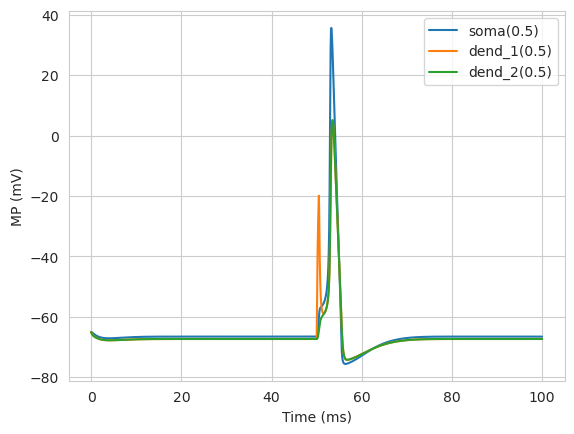

In [13]:
fig,axs = plt.subplots()
axs.plot(t,v_soma,label="soma(0.5)")
axs.plot(t,v_dend_1,label="dend_1(0.5)")
axs.plot(t,v_dend_2,label="dend_2(0.5)")
axs.set(xlabel="Time (ms)",ylabel="MP (mV)")
plt.legend()


## Exercise 1b


- **Mechanisms**
    - Add hh to apicals, soma and axon. 

    - Add pas to basal. 
    
    - Set the following parameters
        - For basal, e_pas = -65

        - For apicals, gna_bar and gk_bar to 10% of its default value and set el to -64

        - Set Ra=160 ohm-cm and cm = 1 uF/cm2 for all sections.

- **Instrumentations**

    - Add Iclamp to apical dendrite 2.

    - Add recorder to record for time and voltage of soma, apical dendrite 1 and axon. 

- Run simulation and plot all traces.

- **Bonus:** record sodium and potassium conductance

- **Bonus:** can you plot MP vs sections instead of time? look up RangeVar in the documentation.




